In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import pickle
import cloudpickle
import matplotlib.pyplot as plt
from IPython.display import display
import shap
from comparers import ModelComparer, plot_decision_boundary
from explainers import generate_shap_explanations, calc_feature_order, calc_class_order,\
                       plot_feature_importance_bar, plot_class_importances
from clustering import make_clustering
from tasks.gaussian_quantiles import make_task

In [2]:
clf_a, clf_b, X, y, feature_names = make_task()

In [3]:
xlim = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
ylim = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

In [4]:
comparer = ModelComparer(clf_a, clf_b, feature_names)

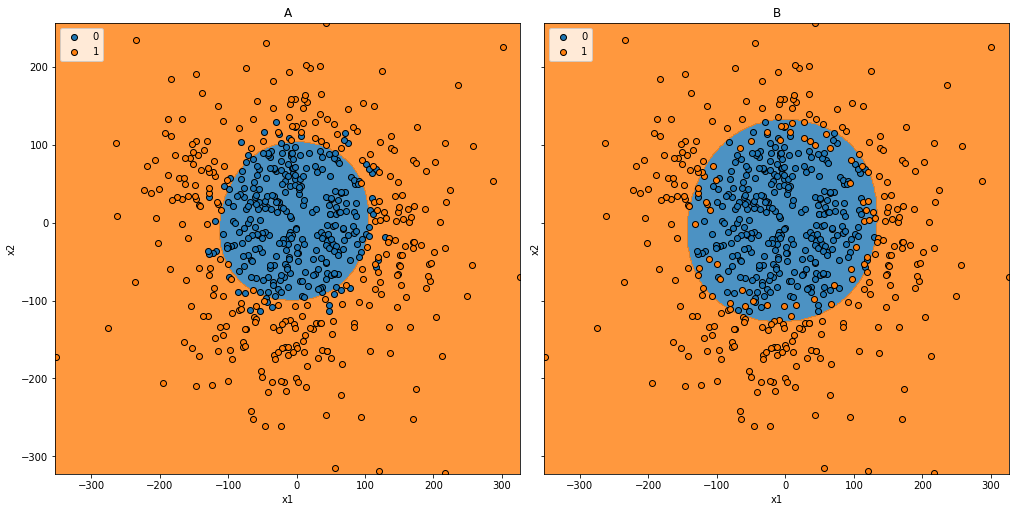

In [5]:
comparer.plot_individual_clf_decision_boundaries(X, y_true=y, kind='label', mesh_step_size=1)

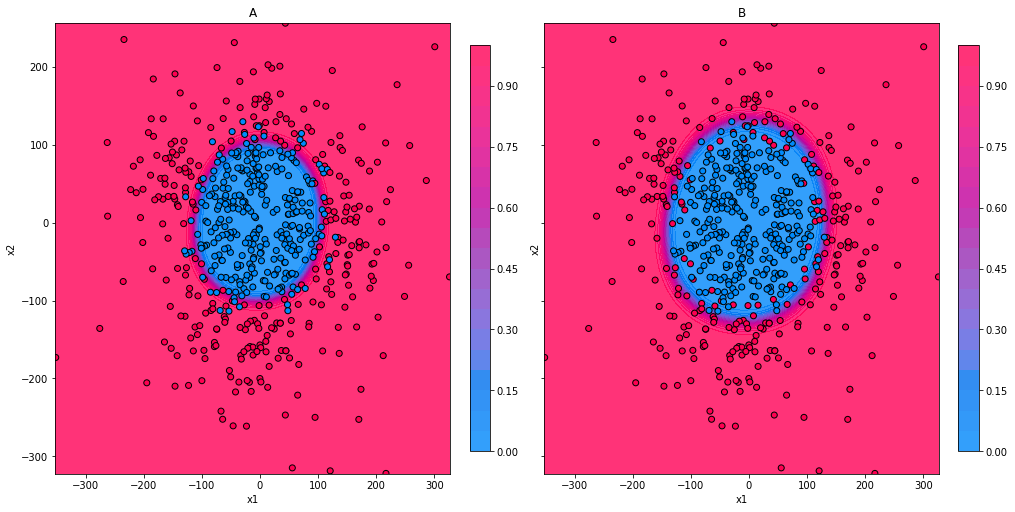

In [6]:
comparer.plot_individual_clf_decision_boundaries(X, y_true=y, kind='proba', mesh_step_size=1)

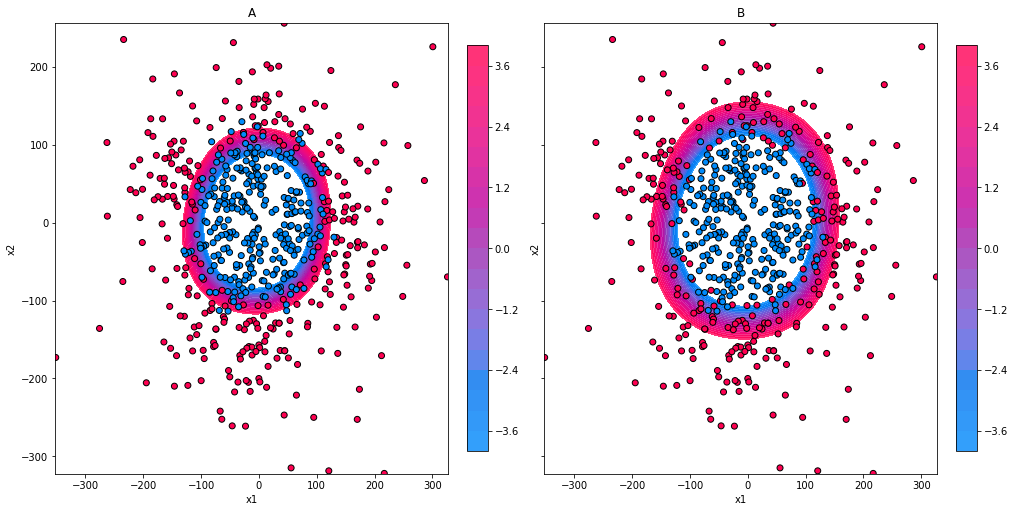

In [7]:
comparer.plot_individual_clf_decision_boundaries(X, y_true=y, kind='log-odds', mesh_step_size=1)

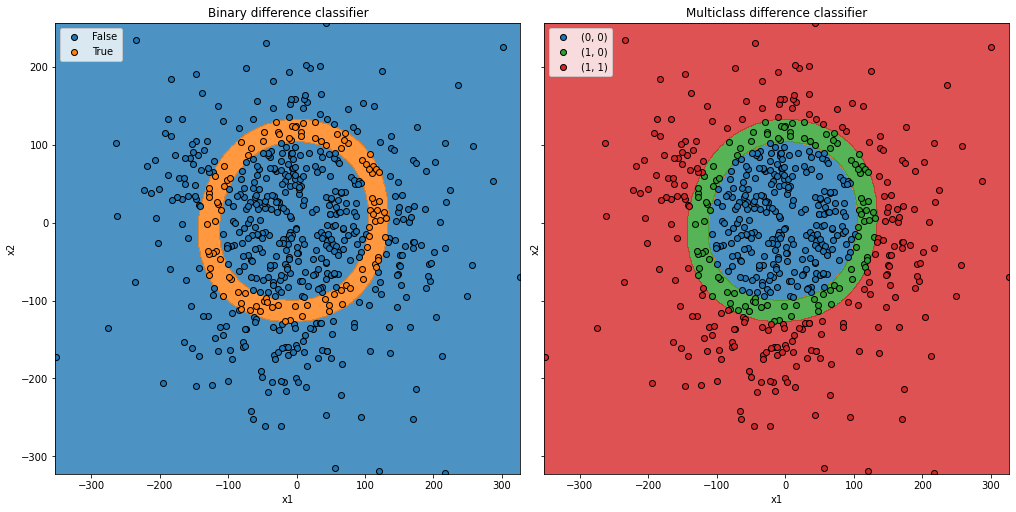

In [8]:
comparer.plot_decision_boundaries(X, mesh_step_size=1)

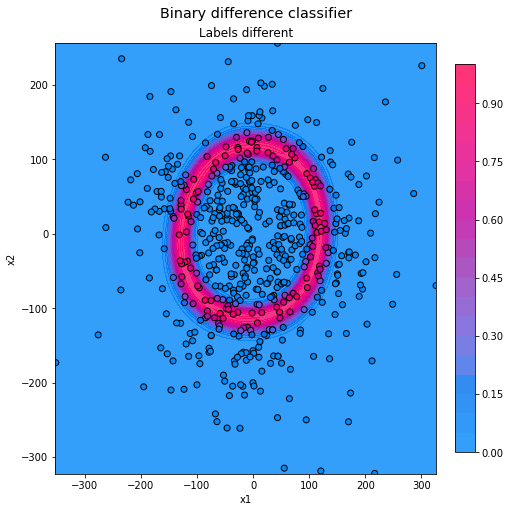

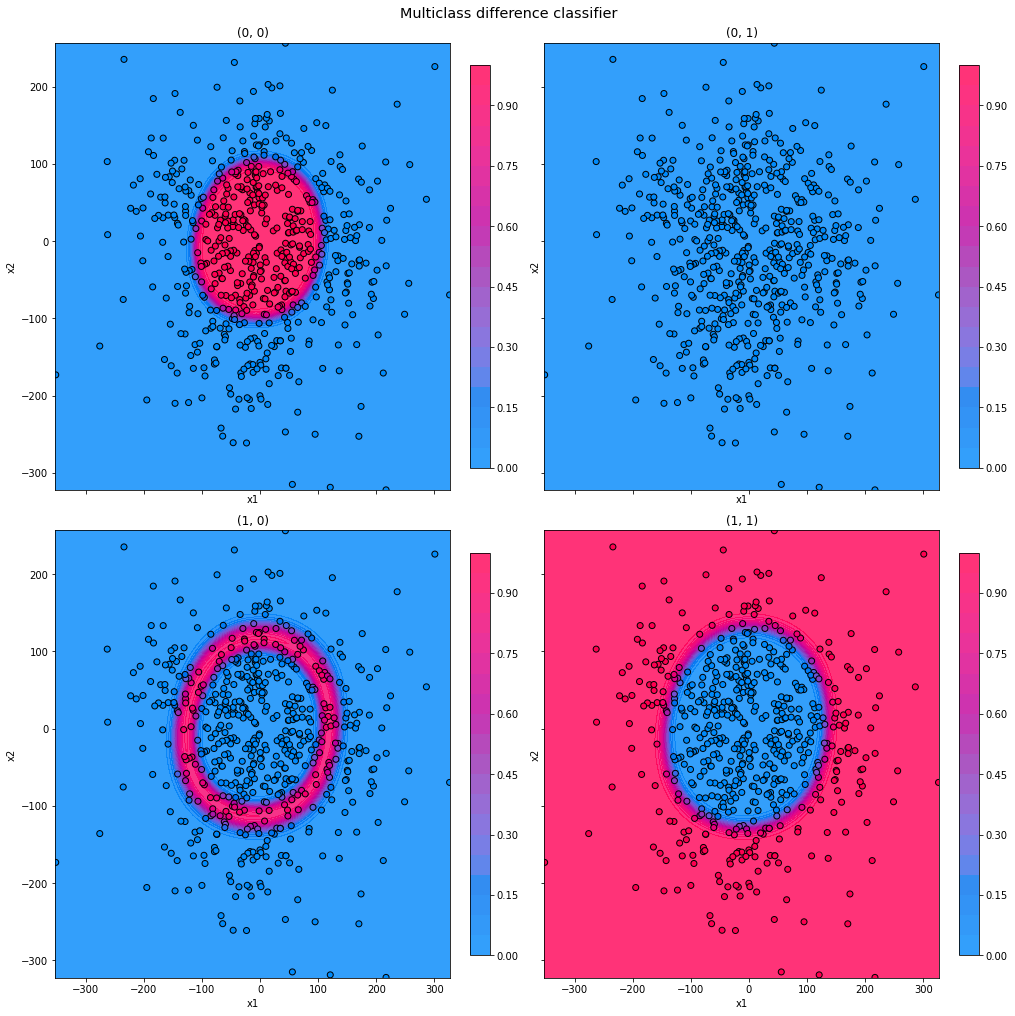

In [9]:
comparer.plot_decision_boundaries(X, kind='proba', mesh_step_size=1)

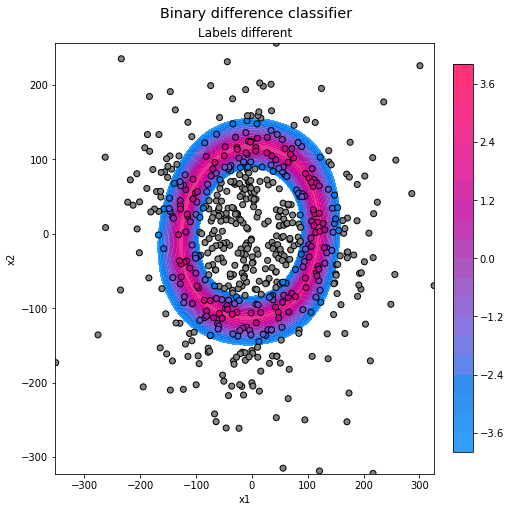

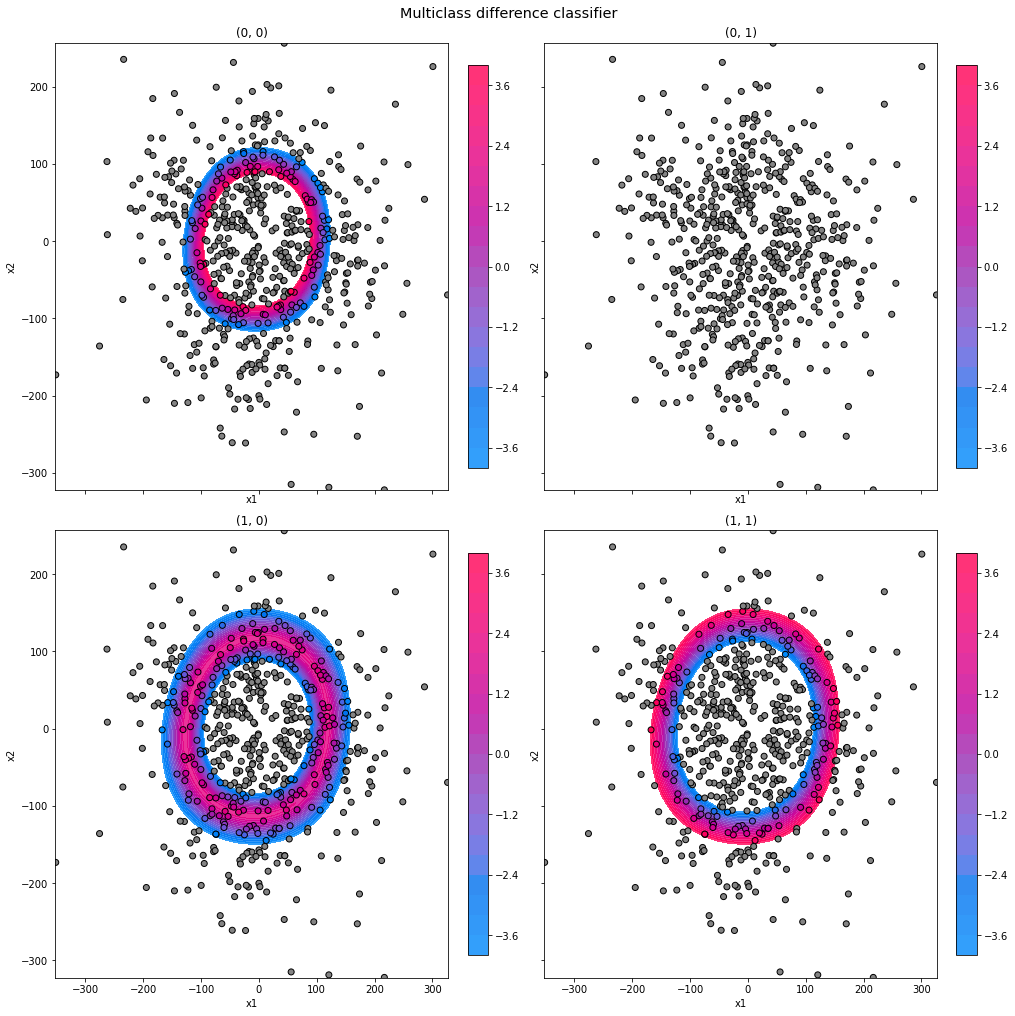

In [10]:
comparer.plot_decision_boundaries(X, kind='log-odds', mesh_step_size=1)

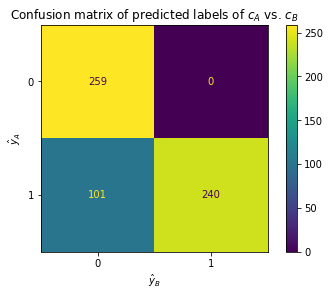

In [11]:
comparer.plot_confusion_matrix(X)

In [12]:
# Do not sample from background data set but use all available instances
masker = shap.maskers.Independent(data=X, max_samples=X.shape[0])

In [13]:
%%time
indiv_shap_values_labels = generate_shap_explanations(comparer, X, masker=masker, explanation_type='indiv', space_type='labels')
indiv_shap_values_proba = generate_shap_explanations(comparer, X, masker=masker, explanation_type='indiv', space_type='proba')
indiv_shap_values_log_odds = generate_shap_explanations(comparer, X, masker=masker, explanation_type='indiv', space_type='log_odds')
diffclf_shap_values_labels = generate_shap_explanations(comparer, X, masker=masker, explanation_type='mclass_diff', space_type='labels')
diffclf_shap_values_proba = generate_shap_explanations(comparer, X, masker=masker, explanation_type='mclass_diff', space_type='proba')
diffclf_shap_values_log_odds = generate_shap_explanations(comparer, X, masker=masker, explanation_type='mclass_diff', space_type='log_odds')
with open('indiv.labels.shap', 'wb') as f:
    pickle.dump(indiv_shap_values_labels, f, pickle.HIGHEST_PROTOCOL)
with open('indiv.proba.shap', 'wb') as f:
    pickle.dump(indiv_shap_values_proba, f, pickle.HIGHEST_PROTOCOL)
with open('indiv.log_odds.shap', 'wb') as f:
    pickle.dump(indiv_shap_values_log_odds, f, pickle.HIGHEST_PROTOCOL)
with open('diffclf.labels.shap', 'wb') as f:
    pickle.dump(diffclf_shap_values_labels, f, pickle.HIGHEST_PROTOCOL)
with open('diffclf.proba.shap', 'wb') as f:
    pickle.dump(diffclf_shap_values_proba, f, pickle.HIGHEST_PROTOCOL)
with open('diffclf.log_odds.shap', 'wb') as f:
    pickle.dump(diffclf_shap_values_log_odds, f, pickle.HIGHEST_PROTOCOL)

Exact explainer: 601it [01:19,  7.24it/s]                         
Exact explainer: 601it [00:58,  8.38it/s]                         
Exact explainer: 601it [01:01,  8.05it/s]                         
Exact explainer: 601it [00:56,  9.04it/s]                         
Exact explainer: 601it [00:58,  8.41it/s]                         
Exact explainer: 601it [01:00,  8.18it/s]                         


CPU times: user 5min 48s, sys: 3.86 s, total: 5min 52s
Wall time: 6min 14s


# Traditional SHAP Explanations

## Labels

In [14]:
with open('indiv.labels.shap', 'rb') as f:
    indiv_shap_values = pickle.load(f)

In [15]:
# For binary classification problems only the positive class is interesting
indiv_shap_values = indiv_shap_values[:, :, ['A.1', 'B.1']]

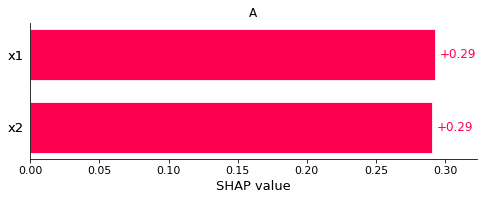

In [16]:
feature_order, feature_importance = calc_feature_order(indiv_shap_values[:, :, 'A.1'])
plot_feature_importance_bar(feature_importance, 'A', feature_order)

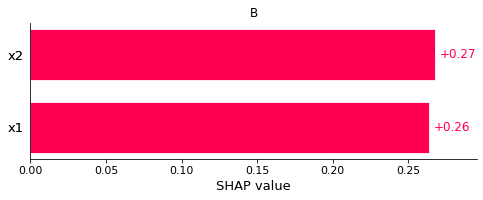

In [17]:
feature_order, feature_importance = calc_feature_order(indiv_shap_values[:, :, 'B.1'])
plot_feature_importance_bar(feature_importance, 'B', feature_order)

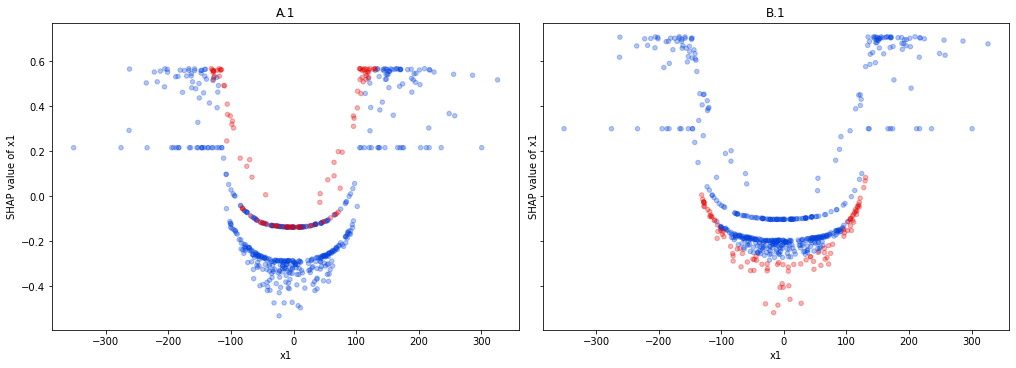

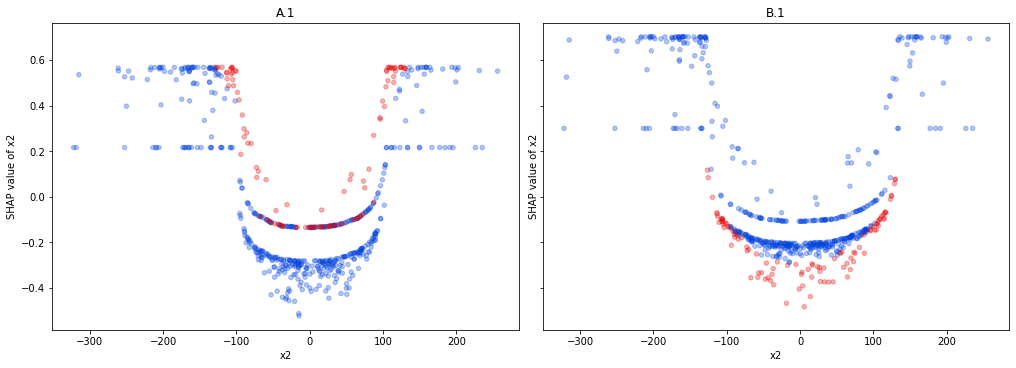

In [18]:
node = make_clustering(comparer, indiv_shap_values)
for feature in comparer.feature_names:
    node.plot_feature_dependence(feature, alpha=0.3)

## Probability

In [19]:
with open('indiv.proba.shap', 'rb') as f:
    indiv_shap_values = pickle.load(f)

In [20]:
# For binary classification problems only the positive class is interesting
indiv_shap_values = indiv_shap_values[:, :, ['A.1', 'B.1']]

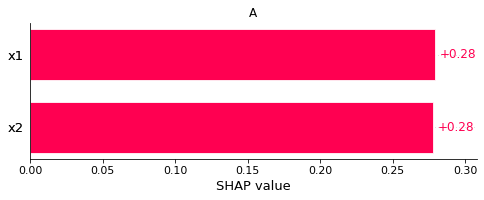

In [21]:
feature_order, feature_importance = calc_feature_order(indiv_shap_values[:, :, 'A.1'])
plot_feature_importance_bar(feature_importance, 'A', feature_order)

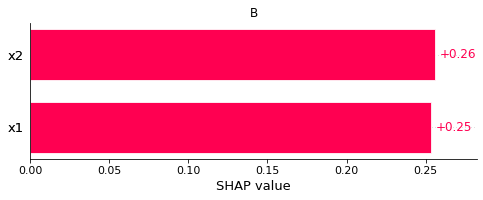

In [22]:
feature_order, feature_importance = calc_feature_order(indiv_shap_values[:, :, 'B.1'])
plot_feature_importance_bar(feature_importance, 'B', feature_order)

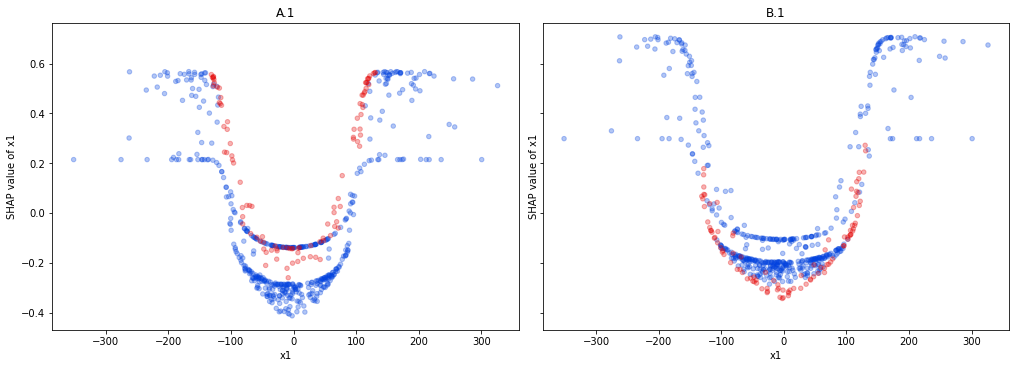

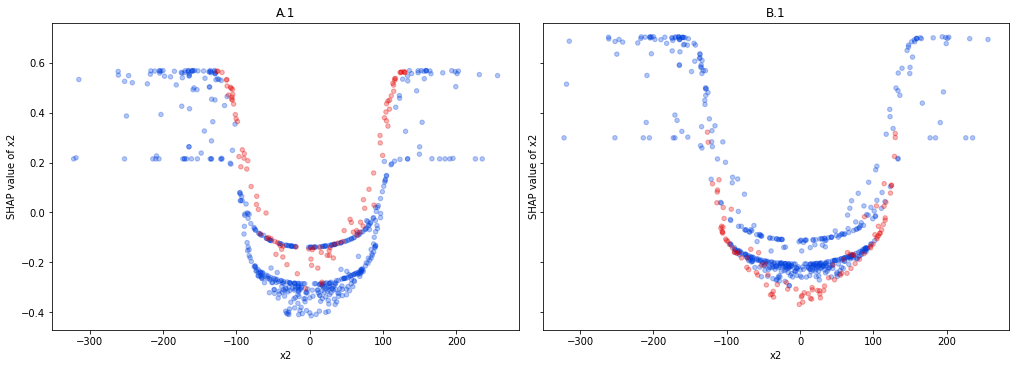

In [23]:
node = make_clustering(comparer, indiv_shap_values)
for feature in comparer.feature_names:
    node.plot_feature_dependence(feature, alpha=0.3)

## Log Odds

In [24]:
with open('indiv.log_odds.shap', 'rb') as f:
    indiv_shap_values = pickle.load(f)

In [25]:
# For binary classification problems only the positive class is interesting
indiv_shap_values = indiv_shap_values[:, :, ['A.1', 'B.1']]

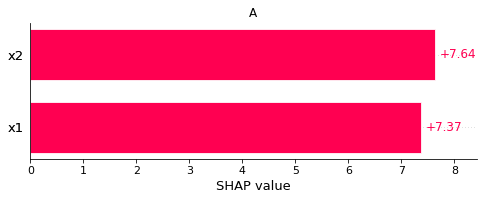

In [26]:
feature_order, feature_importance = calc_feature_order(indiv_shap_values[:, :, 'A.1'])
plot_feature_importance_bar(feature_importance, 'A', feature_order)

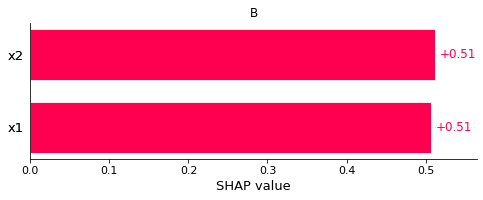

In [27]:
feature_order, feature_importance = calc_feature_order(indiv_shap_values[:, :, 'B.1'])
plot_feature_importance_bar(feature_importance, 'B', feature_order)

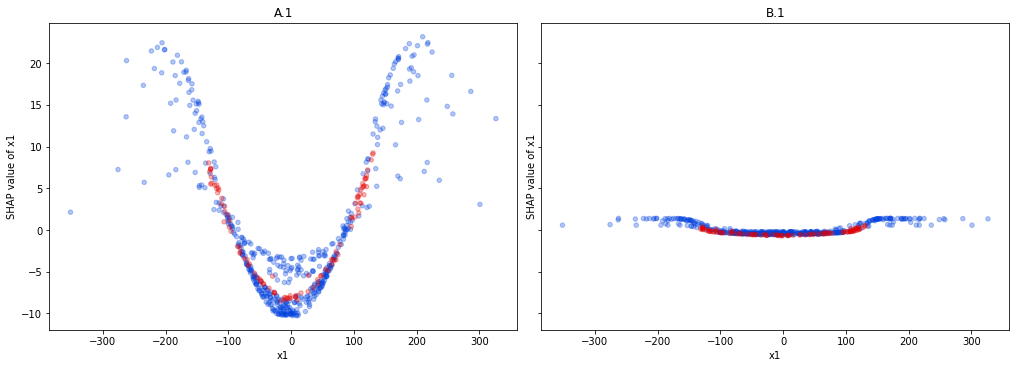

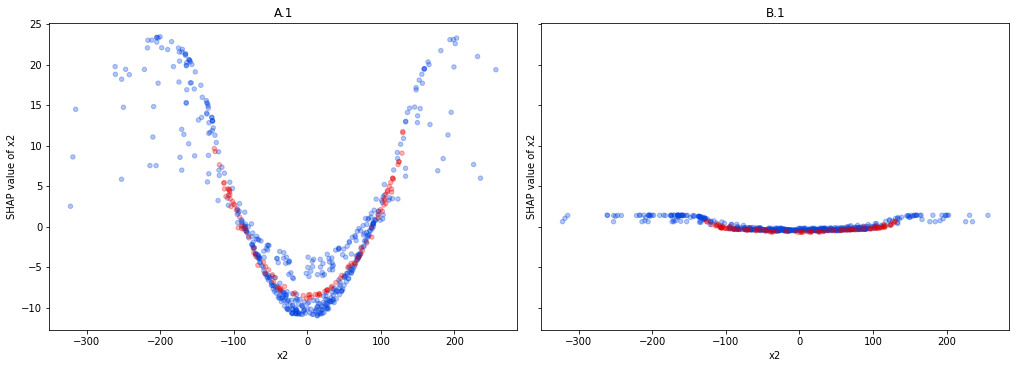

In [28]:
node = make_clustering(comparer, indiv_shap_values)
for feature in comparer.feature_names:
    node.plot_feature_dependence(feature, alpha=0.3)

# Difference Classifier SHAP Explanations

## Labels

In [29]:
with open('diffclf.labels.shap', 'rb') as f:
    diffclf_shap_values = pickle.load(f)

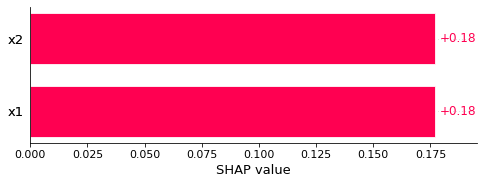

In [30]:
feature_order, feature_importances = calc_feature_order(diffclf_shap_values)
plot_feature_importance_bar(feature_importances)

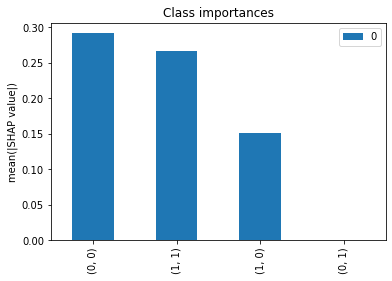

In [31]:
class_order, class_importances = calc_class_order(diffclf_shap_values)
plot_class_importances(class_importances, class_order, diffclf_shap_values.output_names)

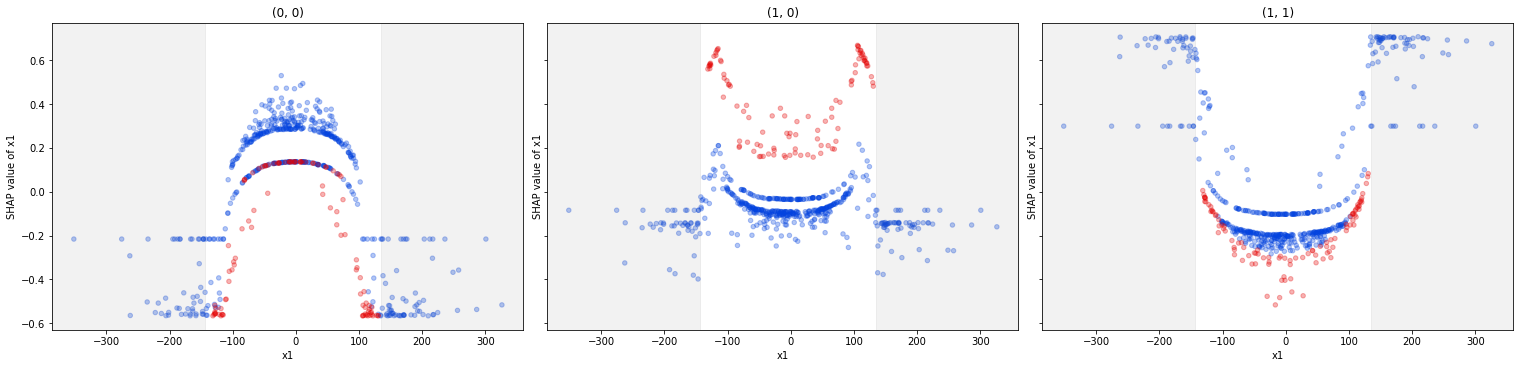

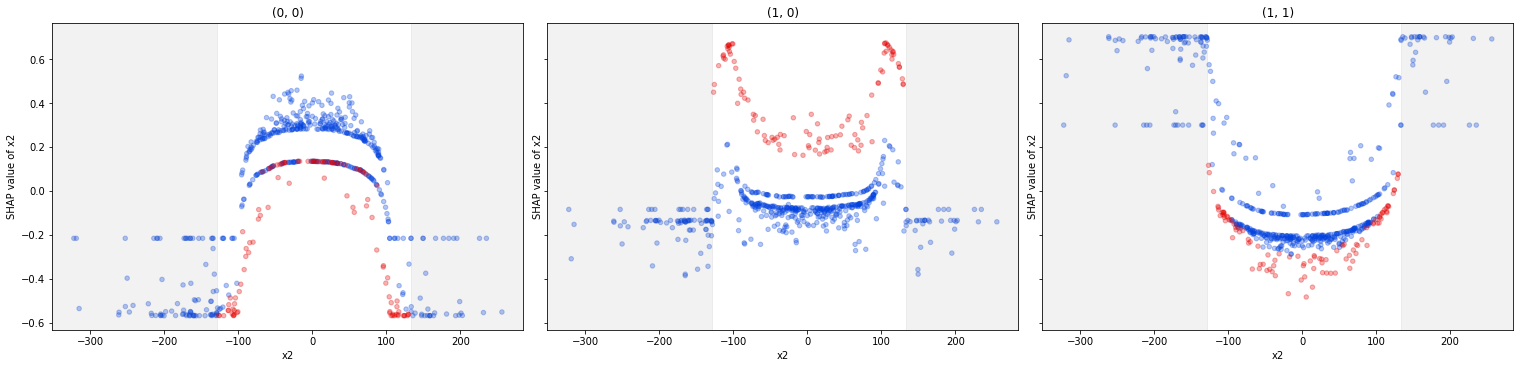

In [32]:
node = make_clustering(comparer, diffclf_shap_values, '(1, 0)', ['(0, 0)', '(1, 0)', '(1, 1)'])
for feature in comparer.feature_names:
    node.plot_feature_dependence(feature, alpha=0.3)

## Probability

In [33]:
with open('diffclf.proba.shap', 'rb') as f:
    diffclf_shap_values = pickle.load(f)

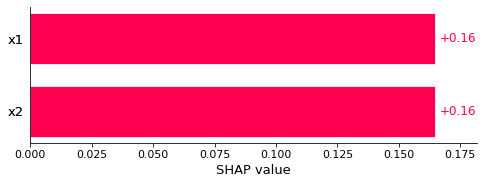

In [34]:
feature_order, feature_importances = calc_feature_order(diffclf_shap_values)
plot_feature_importance_bar(feature_importances)

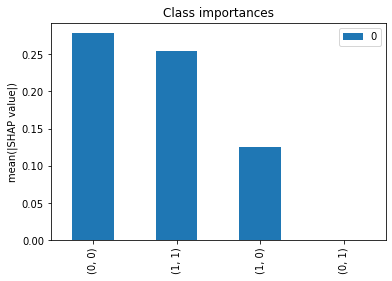

In [35]:
class_order, class_importances = calc_class_order(diffclf_shap_values)
plot_class_importances(class_importances, class_order, diffclf_shap_values.output_names)

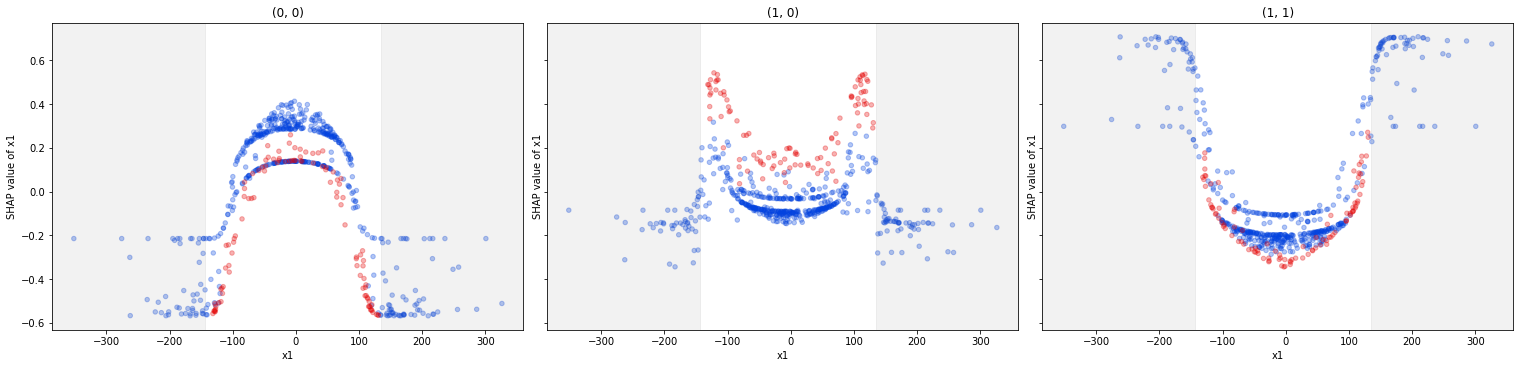

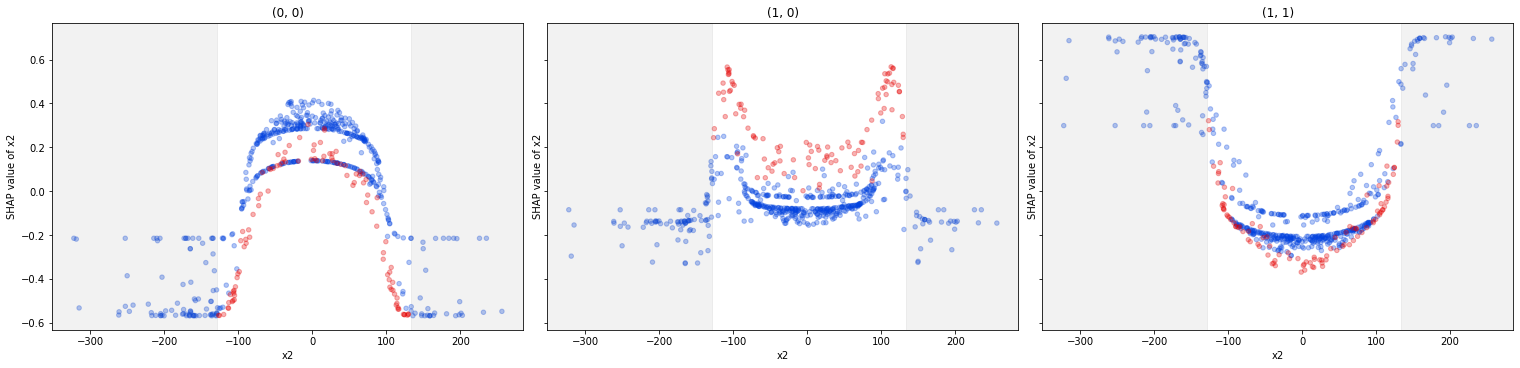

In [36]:
node = make_clustering(comparer, diffclf_shap_values, '(1, 0)', ['(0, 0)', '(1, 0)', '(1, 1)'])
for feature in comparer.feature_names:
    node.plot_feature_dependence(feature, alpha=0.3)

## Log Odds

In [37]:
with open('diffclf.log_odds.shap', 'rb') as f:
    diffclf_shap_values = pickle.load(f)

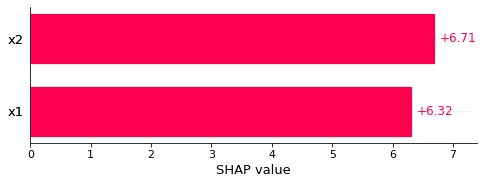

In [38]:
feature_order, feature_importances = calc_feature_order(diffclf_shap_values)
plot_feature_importance_bar(feature_importances)

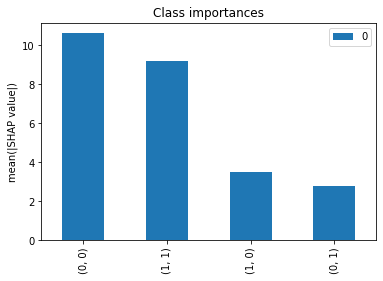

In [39]:
class_order, class_importances = calc_class_order(diffclf_shap_values)
plot_class_importances(class_importances, class_order, diffclf_shap_values.output_names)

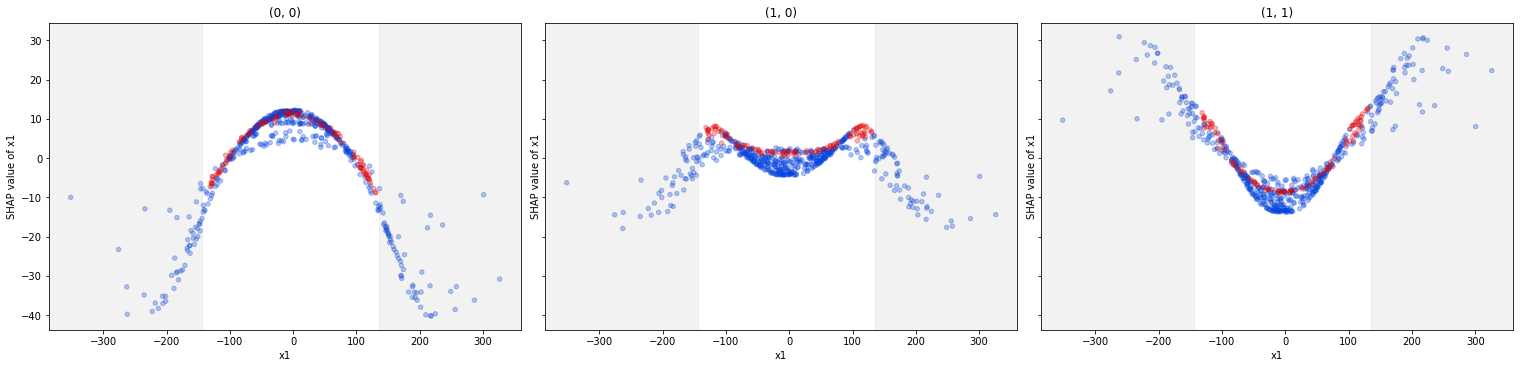

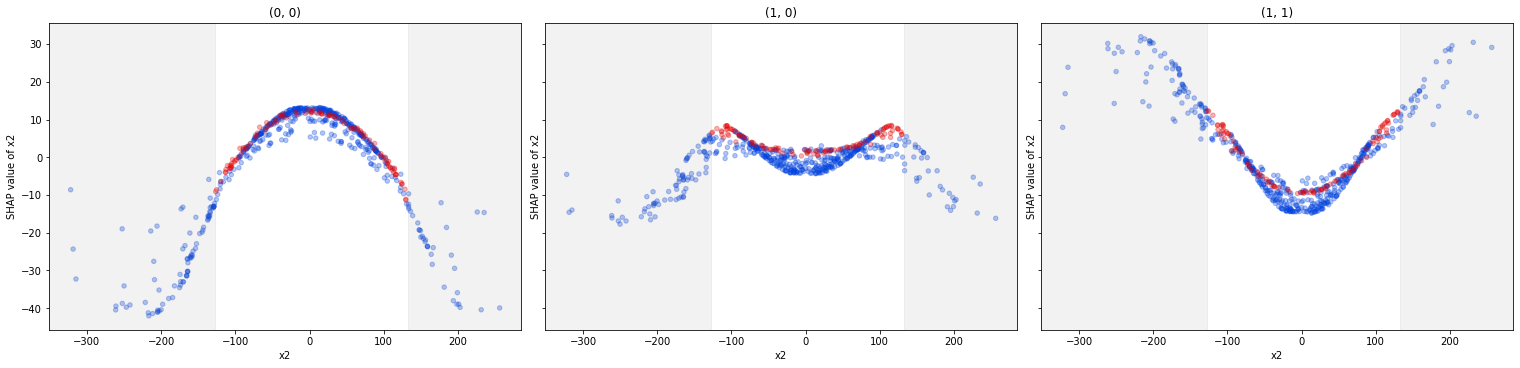

In [40]:
node = make_clustering(comparer, diffclf_shap_values, '(1, 0)', ['(0, 0)', '(1, 0)', '(1, 1)'])
for feature in comparer.feature_names:
    node.plot_feature_dependence(feature, alpha=0.3)